# Development Learning Journal 2. `MainActivity.java`

### **Notes and References**

Hi. I'm currently learning android development and this is my personal learning notebook. 

All the code is from GeeksforGeeks and you can watch the original tutorial in the below link. Have fun learning :) !

https://www.youtube.com/watch?v=wFHR-dR7TpQ&ab_channel=GeeksforGeeks

# New Concepts & Methods
- ActionBar
  - `[res]` - `[values]` - `[themes]` - `themes.xml`
    - `<style name="Theme.TextDetector" parent="Theme.MaterialComponents.DayNight.DarkActionBar">`

# Change theme - `NoActionBar`

We are not displaying any action bar inside our application.

In [ ]:
<resources xmlns:tools="http://schemas.android.com/tools">
    <!-- Base application theme. -->
    <style name="Theme.TextDetector" parent="Theme.MaterialComponents.DayNight.DarkActionBar"> # <-- from DarkActionBar

    <style name="Theme.TextDetector" parent="Theme.MaterialComponents.DayNight.NoActionBar">   # <-- to NoActionBar

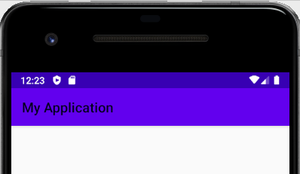

In [ ]:
ActionBar = "/content/here/MyDrive/Android/Text Recognition App/ActionBar.png"
show(ActionBar)  # image from GeeksforGeeks

# 1 `activity_scanner.xml`

In [ ]:
<?xml version="1.0" encoding="utf-8"?>
<RelativeLayout xmlns:android="http://schemas.android.com/apk/res/android"
    xmlns:app="http://schemas.android.com/apk/res-auto"
    xmlns:tools="http://schemas.android.com/tools"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    android:background="@color/black_shade_1"
    tools:context=".ScannerActivity">

    <ImageView
        android:id="@+id/idIVCaptureImage"
        android:layout_width="250dp"
        android:layout_height="250dp"
        android:layout_centerHorizontal="true"
        android:layout_marginTop="70dp"
        android:src="@drawable/scanner"/>

    <TextView
        android:id="@+id/idTVDetectedText"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:layout_marginStart="20dp"
        android:layout_marginEnd="20dp"
        android:layout_below="@id/idIVCaptureImage"
        android:layout_marginTop="20dp"
        android:textColor="@color/yellow"
        android:text="Your result will appear here."
        android:textAlignment="center"
        android:gravity="center"
        android:textSize="18sp"
        android:textStyle="bold"
        android:padding="4dp"/>

    <Button
        android:id="@+id/idBtnPhoto"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:layout_marginStart="20dp"
        android:layout_marginEnd="20dp"
        android:layout_below="@id/idTVDetectedText"
        android:layout_marginTop="30dp"
        android:text="Take a photo"
        android:textAllCaps="false"
        android:background="@drawable/button_back"
        app:backgroundTint="@color/yellow"/>

    <Button
        android:id="@+id/idBtnDetect"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:layout_marginStart="20dp"
        android:layout_marginEnd="20dp"
        android:layout_below="@id/idBtnPhoto"
        android:layout_marginTop="20dp"
        android:text="Detect Text"
        android:textAllCaps="false"
        android:background="@drawable/button_back"
        app:backgroundTint="@color/yellow"/>


</RelativeLayout>

# `MainActivity.java`


### `Intent`?

*An Intent in the Android operating system is a software mechanism that allows users to coordinate the functions of different activities to achieve a task* ([Wikipedia](https://en.wikipedia.org/wiki/Intent_(Android))).


*An Intent object carries information that the Android system uses to determine which component to start (such as the exact component name or component category that should receive the intent), plus information that the recipient component uses in order to properly perform the action (such as the action to take and the data to act upon).*
([Android Documentation](https://developer.android.com/guide/components/intents-filters))

<br/>

Intent contains:  
- Component Name  
- Action    
- Data  

In [ ]:
# MainActivity.java

public class MainActivity extends AppCompatActivity {

    # Declare variable
    private Button captureBtn;

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_main);

        captureBtn = findViewById(R.id.idBtnCapture);
        captureBtn.setOnClickListener(new View.OnClickListener() {
            @Override
            public void onClick(View v) {
                # ScannerActivity has been created and UI set in the previous section.
                Intent i = new Intent(MainActivity.this, ScannerActivity.class); 
                startActivity(i);
            }
        });

    }
}

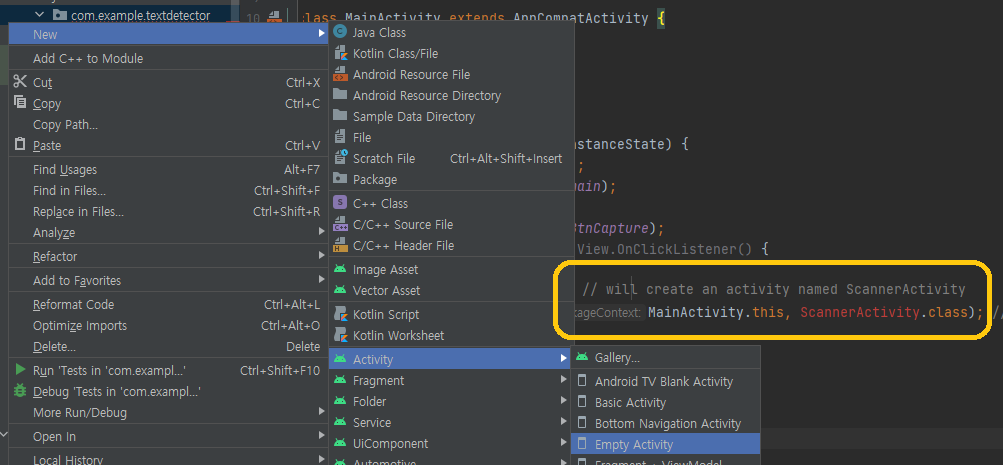

In [ ]:
path = "/content/here/MyDrive/Android/Text Recognition App/EmptyActivity.png"
show(path)

# `ScannerActivity.java`


## SA 1. Initialise

In [ ]:
public class ScannerActivity extends AppCompatActivity {

    # Wire the layout components from xml.
    private ImageView captureIV;
    private TextView resultTV;
    private Button photoBtn, detectBtn;
    # This is NOT part of the UI components.However, will be used when the user scans an image.
    private Bitmap imageBitmap;
    # Variable needed for permission handling
    static final int REQUEST_IMAGE_CAPTURE = 1;

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_scanner);

        # Initialise the layout variables here.
        captureIV = findViewById(R.id.idIVCaptureImage);
        resultTV = findViewById(R.id.idTVDetectedText);
        photoBtn = findViewById(R.id.idBtnPhoto);
        detectBtn = findViewById(R.id.idBtnDetect);

        # handle user click event.
        detectBtn.setOnClickListener(new View.OnClickListener(){
            @Override
            public void onClick(View v){
                # custom method detectText() to be created.
                detectText();
            }
        });

        photoBtn.setOnClickListener(new View.OnClickListener(){
            @Override
            public void onClick(View v){

            }
        });
    }

    ...

## SA 2. Handle Permissions


In [7]:
from google.colab import drive
drive.mount('here')
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

def show(path, cvtColor=False):
    img = cv2.imread(path)
    if (cvtColor == True):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2_imshow(img)

def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img

Drive already mounted at here; to attempt to forcibly remount, call drive.mount("here", force_remount=True).


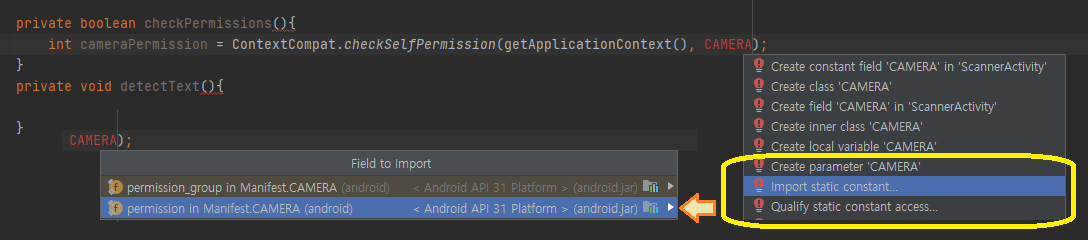

In [8]:
path = "/content/here/MyDrive/Android/Text Recognition App/Camera permission 01.png"
show(path)

In [ ]:
    ...
    
    # handle permissions
    private boolean checkPermissions(){
        int cameraPermission = ContextCompat.checkSelfPermission(getApplicationContext(), CAMERA);
        # Returns true only when the permission is granted.
        return cameraPermission == PackageManager.PERMISSION_GRANTED;
    }

    private void requestPermissions(){
        int PERMISSION_CODE = 200;
        ActivityCompat.requestPermissions(this, new String[] {CAMERA}, PERMISSION_CODE);
    }

    private  void  captureImage(){
        # capture an image.
        Intent takePicture = new Intent(MediaStore.ACTION_IMAGE_CAPTURE);
        if(takePicture.resolveActivity(getPackageManager()) != null) {
            # call to start the takePicture Intent.
            startActivityForResult(takePicture, REQUEST_IMAGE_CAPTURE);
        }
    }

    @Override
    public void onRequestPermissionsResult(int requestCode, String[] permissions, @NonNull int[] grantResults) {
        super.onRequestPermissionsResult(requestCode, permissions, grantResults);
        if(grantResults.length > 0){
            boolean cameraPermission = grantResults[0] == PackageManager.PERMISSION_GRANTED;
            if(cameraPermission){
                Toast.makeText(this, "Permissions granted", Toast.LENGTH_SHORT).show();
                captureImage();
            } else {
                Toast.makeText(this, "Permissions denied", Toast.LENGTH_SHORT).show();
            }
        }
    }

    ...

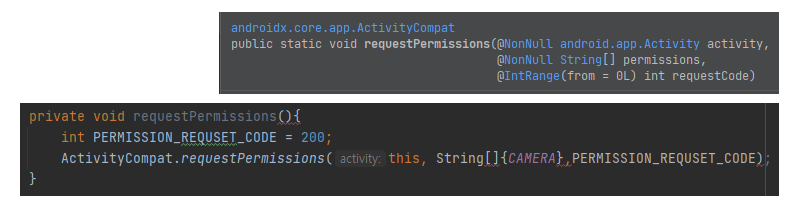

In [9]:
path = "/content/here/MyDrive/Android/Text Recognition App/request permission 01.png"
show(path)

## SA 3. Capture Image

In [ ]:
    ...
    
    @Override
    protected void onActivityResult(int requestCode, int resultCode, @Nullable Intent data){
        super.onActivityResult(requestCode, resultCode, data);
        if(requestCode == REQUEST_IMAGE_CAPTURE && requestCode == RESULT_OK){
            Bundle extras = data.getExtras();
            imageBitmap = (Bitmap) extras.get("data");
            captureIV.setImageBitmap(imageBitmap);
        }
    }

    private  void  captureImage(){
        # capture an image.
        Intent takePicture = new Intent(MediaStore.ACTION_IMAGE_CAPTURE);
        if(takePicture.resolveActivity(getPackageManager()) != null) {
            # call to start the takePicture Intent.
            startActivityForResult(takePicture, REQUEST_IMAGE_CAPTURE);
        }
    }

    ...

## SA 4. Detect Text

In [ ]:
    ...
    
    private void detectText(){
        // In order to detect the text, first create an image
        InputImage image = InputImage.fromBitmap(imageBitmap, 0); // int rotation
        TextRecognizer textRecognizer = TextRecognition.getClient(TextRecognizerOptions.DEFAULT_OPTIONS);
        Task<Text> result = textRecognizer.process(image).addOnSuccessListener(new OnSuccessListener<Text>() {
            @Override
            public void onSuccess(@NonNull Text text) {
                StringBuilder result = new StringBuilder();
                for (Text.TextBlock block: text.getTextBlocks()){
                    String blockText = block.getText();
                    Point[] blockCornerPoint = block.getCornerPoints();
                    Rect blockFrame = block.getBoundingBox();
                    for(Text.Line line: block.getLines()){
                        String lineText = line.getText();
                        Point[] lineCornerPoint = block.getCornerPoints();
                        Rect lineFrame = line.getBoundingBox();
                        for (Text.Element element: line.getElements()){
                            String elementText = element.getText();
                            result.append(elementText);
                        }
                        resultTV.setText(blockText);
                    }
                }

            }
        }).addOnFailureListener(new OnFailureListener() {
            @Override
            public void onFailure(@NonNull Exception e) {
                Toast.makeText(ScannerActivity.this, "Failed to detect text from image" + e.getMessage(), Toast.LENGTH_SHORT).show();
            }
        });
    }
}